In [1]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time

In [2]:
imagedirectory='./lfw1000'
image = Image.open(os.path.join(imagedirectory, os.listdir(imagedirectory)[0]))

In [3]:
nrows, ncolumns = image.height, image.width

In [4]:
nimages=len(os.listdir(imagedirectory))

In [5]:
M=np.empty([nrows*ncolumns,nimages])
M.shape

(4096, 1071)

In [6]:
for i, filename in enumerate(os.listdir(imagedirectory)):
    image = Image.open(os.path.join(imagedirectory, filename))
    M[:,i] = np.asarray(image.getdata())

In [7]:
M.shape

(4096, 1071)

In [8]:
M

array([[133., 216.,  62., ...,  22.,  85., 144.],
       [155., 212.,  87., ...,  28.,  96., 147.],
       [164., 210., 118., ...,  38.,  97., 148.],
       ...,
       [ 63., 109.,  30., ...,  50., 133.,  19.],
       [ 62., 108.,  36., ...,  47., 144.,  17.],
       [ 65., 109.,  43., ...,  31., 135.,  19.]])

In [9]:
def ICA(M):
    mu=np.mean(M,axis=1,keepdims=True) #(4096,1)
    M=M-mu # (4096,1071)
    R_MM=M@np.transpose(M) #(4096,4096)
    E,diag,temp=np.linalg.svd(R_MM) # (4096,4096)
    C=np.diag(diag**(-0.5))@np.transpose(E) #(4096,4096)@(4096,4096)= (4096,4096)
    X=C@M #(4096,4096)@(4096,1071)=(4096,1071)  
#     print('mean of each row:',np.mean(X,axis=1))
#     print('variance of each row:',np.var(X,axis=1))
    X_col_norm=np.sum(X**2,axis=0) #(1071,1)
    D=(X@(X*X_col_norm).T)/X.shape[1] #(4096,4096)
    U,eigenvalue,temp=np.linalg.svd(D)
    A=np.transpose(U)@C
#     H=A@M
    #return H+mean
    ICA_faces=np.linalg.pinv(A)
    return M,ICA_faces

In [10]:
X,ICA_faces=ICA(M)

In [11]:
ICA_faces.shape

(4096, 4096)

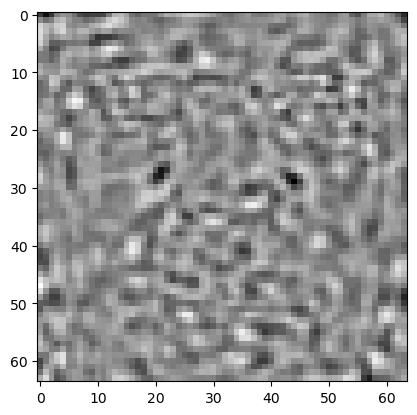

In [12]:
ICA_face1=ICA_faces[:,0]
ICA_face1=ICA_face1.reshape(nrows,ncolumns)
img=plt.imshow(ICA_face1,cmap='gray')

In [13]:
errors=[]
time_start=time.time()
for k in range(1,101):
    error=0
    ICA_bases=ICA_faces[:,:k] #ICA_faces:(4096,k)
    proj=ICA_bases@np.linalg.pinv(ICA_bases) #(4096,4096)
    ematrix=X-proj@X
    for i in range(ematrix.shape[1]):
        error=error+np.linalg.norm(ematrix[:,i])
    error=error/X.shape[1]
    errors.append(error)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 17.206544637680054 s


[]

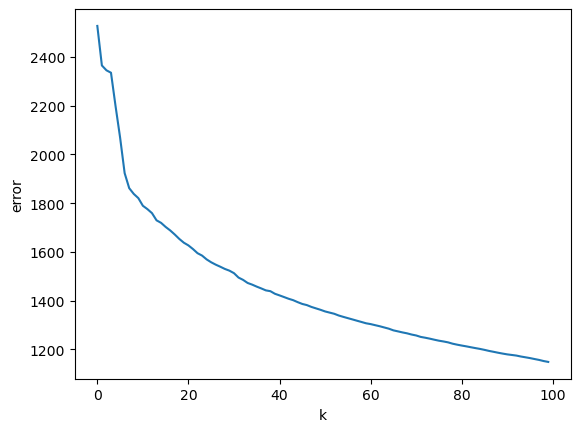

In [14]:
fig,ax=plt.subplots()
ax.plot(range(100),errors)
ax.set_xlabel("k")
ax.set_ylabel("error")
plt.plot()

In [15]:
print("The mean reconstruction error using k=100 is {e}".format(e=errors[99]))

The mean reconstruction error using k=100 is 1148.4466916397569


In [16]:
ICA_face1=ICA_faces[:,0]
ICA_face2=ICA_faces[:,1]

In [17]:
np.dot(ICA_face1,ICA_face2)

-11444.80323916601

In [18]:
angle=np.arccos(np.dot(ICA_face1,ICA_face2)/(np.linalg.norm(ICA_face1)*np.linalg.norm(ICA_face2)))
angle

1.6378963093398626